In [1]:
!pip install scikit-image
import numpy as np
from skimage import data
i = data.astronaut()

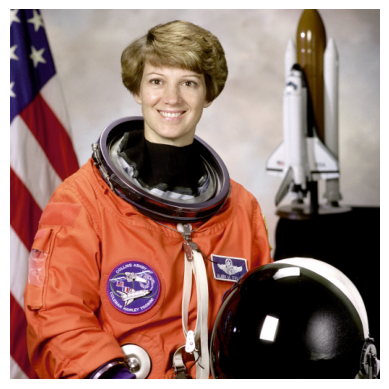

In [2]:
import matplotlib.pyplot as plt
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

In [3]:
i_transformed = np.copy(i)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]

In [4]:
# This filter detects edges nicely
# It creates a convolution that only passes through sharp edges and straight
# lines.

#Experiment with different values for fun effects.
#filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]]

# A couple more filters to try for fun!
filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
#filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]

# If all the digits in the filter don't add up to 0 or 1, you
# should probably do a weight to get it to do so
# so, for example, if your weights are 1,1,1 1,2,1 1,1,1
# They add up to 10, so you would set a weight of .1 if you want to normalize them
weight  = 1

In [5]:
i_transformed = np.zeros_like(i)
filter = np.array(filter)  # Make sure filter is a 3x3 numpy array
for x in range(1, size_x - 1):
    for y in range(1, size_y - 1):
        convolution = 0.0

        for fx in range(3):
            for fy in range(3):
                convolution += i[x + fx - 1, y + fy - 1] * filter[fx, fy]
        convolution *= weight
        convolution = np.clip(convolution, 0, 255)
        i_transformed[x, y] = convolution

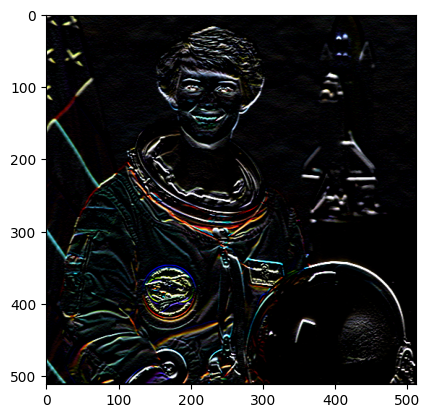

In [6]:
# Plot the image. Note the size of the axes -- they are 512 by 512
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
#plt.axis('off')
plt.show()

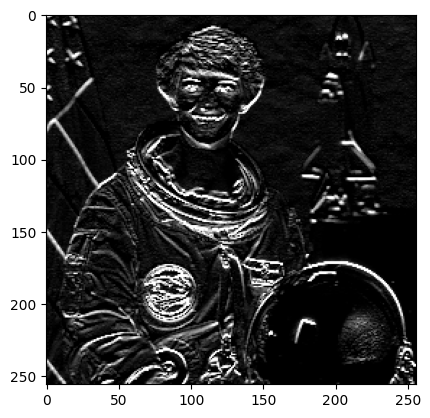

In [7]:
new_x = int(size_x / 2)  # New size for the image (halved in both dimensions)
new_y = int(size_y / 2)
newImage = np.zeros((new_x, new_y))

for x in range(0, size_x - 1, 2):  # Prevent out of bounds for x+1
    for y in range(0, size_y - 1, 2):  # Prevent out of bounds for y+1

        pixels = [
            i_transformed[x, y], i_transformed[x+1, y],
            i_transformed[x, y+1], i_transformed[x+1, y+1]
        ]

        if isinstance(pixels[0], np.ndarray):  # Check if it's a color image
            pixels = [max(p.max() for p in pixel) if isinstance(pixel, np.ndarray) else float(pixel) for pixel in pixels]
        pixels.sort(reverse=True)
        newImage[int(x / 2), int(y / 2)] = pixels[0]  # Take the max value from the 2x2 block

# Plot the image
plt.gray()
plt.grid(False)
plt.imshow(newImage)  # Display the reduced image
plt.savefig('final.png')  # Save the image to file
plt.show()  # Show the image
